In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import string
import re

#Library for nltk
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk import word_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn import metrics

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [4]:
df=pd.read_csv('/content/sample_data/toyota_camry_comfort(1).csv')
df.head()

,Comments,Review
0,Ride seems comfortable and gas mileage fairly ...,0
1,Ride is lovely,0
2,"Seats are fine, in fact of all the smaller sed...",0
3,Great gas mileage and comfortable on long trips .,0
4,"Good gas mileage, comfortable seating, lots of...",0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  120 non-null    object
 1   Review    120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [6]:
df.isnull().sum()

Comments    0
Review      0
dtype: int64

In [7]:
data=df.copy()

In [8]:
def number_of_words(data):
    data['word_count'] = data['Comments'].apply(lambda x : len(str(x).split(" ")))

In [9]:
def char_count(text):
    charc=0
    for char in text.split():
        charc +=len(char)
    return charc

In [10]:
stop_words = stopwords.words('english')

def num_of_stopwords(data):
    data['stopwords_count'] = data['Comments'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

In [11]:
def feat_extract(data):
    number_of_words(data)
    data['char_count']=data['Comments'].apply(char_count)
    num_of_stopwords(data)

In [12]:
def clean_comments(Comments):
    temp= Comments.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    punc=string.punctuation
    temp=temp.translate(str.maketrans('','',punc))
    
    #removing stopwords
    new_list=[]
    words=word_tokenize(temp)
    sws=stopwords.words('english')
    for word in words:
        if word not in sws:
            new_list.append(word)
    
    temp=' '.join(new_list)
    return temp

In [13]:
def spell_correct(data):
    data['Comments'].apply(lambda x: str(TextBlob(x).correct()))


In [14]:
def lemmatize(text):    
    new_list=[]
    lemma=WordNetLemmatizer()
    words=word_tokenize(text)
    for word in words:
        new_list.append(lemma.lemmatize(word))
    
    return ' '.join(new_list)

In [15]:
feat_extract(data)

data['Comments'] = data['Comments'].apply(clean_comments)
data['final_Comments'] = data['Comments'].apply(lemmatize)

In [16]:
data.head()

,Comments,Review,word_count,char_count,stopwords_count,final_Comments
0,ride seems comfortable gas mileage fairly good...,0,16,72,2,ride seems comfortable gas mileage fairly good...
1,ride lovely,0,3,12,1,ride lovely
2,seats fine fact smaller sedans comfortable fou...,0,29,98,14,seat fine fact smaller sedan comfortable found...
3,great gas mileage comfortable long trips,0,9,41,2,great gas mileage comfortable long trip
4,good gas mileage comfortable seating lots leg ...,0,10,48,1,good gas mileage comfortable seating lot leg room


In [17]:
sid=SentimentIntensityAnalyzer()

In [18]:
data['sentiment_compound_polarity']=data.final_Comments.apply(lambda x:sid.polarity_scores(x)['compound'])
data['sentiment_neg']=data.final_Comments.apply(lambda x:sid.polarity_scores(x)['neg'])
data['sentiment_pos']=data.final_Comments.apply(lambda x:sid.polarity_scores(x)['pos'])
data['sentiment_type']=''

data.loc[data.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
data.loc[data.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
data.head()

,Comments,Review,word_count,char_count,stopwords_count,final_Comments,sentiment_compound_polarity,sentiment_neg,sentiment_pos,sentiment_type
0,ride seems comfortable gas mileage fairly good...,0,16,72,2,ride seems comfortable gas mileage fairly good...,0.7351,0.0,0.360,POSITIVE
1,ride lovely,0,3,12,1,ride lovely,0.5859,0.0,0.792,POSITIVE
2,seats fine fact smaller sedans comfortable fou...,0,29,98,14,seat fine fact smaller sedan comfortable found...,0.6249,0.0,0.421,POSITIVE
3,great gas mileage comfortable long trips,0,9,41,2,great gas mileage comfortable long trip,0.8126,0.0,0.649,POSITIVE
4,good gas mileage comfortable seating lots leg ...,0,10,48,1,good gas mileage comfortable seating lot leg room,0.7351,0.0,0.508,POSITIVE


<Axes: ylabel='sentiment_type'>

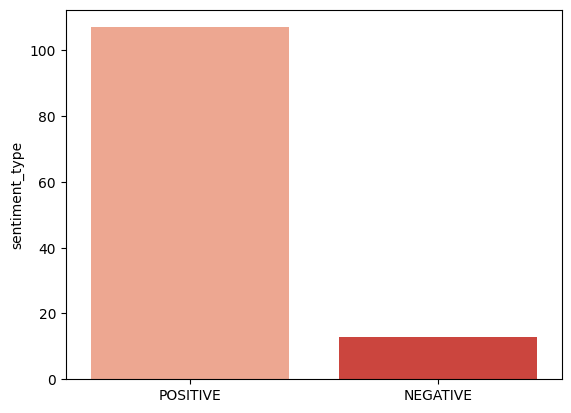

In [19]:
sns.barplot(data=data,x=data['sentiment_type'].value_counts().index,y=data['sentiment_type'].value_counts(),palette='Reds')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(data["Comments"], data["Review"], test_size=0.3, random_state=42)
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_vectors, y_train)

y_pred = clf.predict(X_test_vectors)

from sklearn.metrics import accuracy_score, classification_report
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


print(classification_report(y_test, y_pred))

Accuracy: 83.33%
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        27
           1       1.00      0.33      0.50         9

    accuracy                           0.83        36
   macro avg       0.91      0.67      0.70        36
weighted avg       0.86      0.83      0.80        36

